In [1]:
import numpy as np 
import pandas as pd
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline 
import matplotlib.pyplot as plt
import pylab as pl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import itertools
from imblearn.over_sampling import SMOTE
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

In [2]:
df = pd.read_csv(r'C:\Users\Mahe\Desktop\Wildfire-Predictor\final.csv')
df=df.drop(columns=['Unnamed: 0'])
df.head()

,date,lat,lon,mask,lst,lstn,ndvi,vcr,prec,ma_cat
0,2019-06-02,39.737500,-122.295833,9.0,310.26000,290.921693,0.3108,0.59,0.718065,1
1,2019-06-10,39.737500,-122.295833,5.0,323.92000,290.921693,0.2526,0.59,0.000000,0
2,2019-06-18,39.737500,-122.295833,5.0,309.33877,297.900000,0.2526,0.59,0.000000,0
3,2019-06-02,39.729167,-122.295833,9.0,310.36000,290.921693,0.3198,0.57,0.718065,1
4,2019-06-10,39.729167,-122.295833,5.0,321.90000,290.921693,0.2670,0.57,0.000000,0


In [3]:
X = df[['vcr', 'lst','ndvi','lstn','prec']] .values  #.astype(float)
x=df[['vcr', 'lst','ndvi','lstn','prec']]
X[0:5]

array([[5.90000000e-01, 3.10260000e+02, 3.10800000e-01, 2.90921693e+02,
        7.18065143e-01],
       [5.90000000e-01, 3.23920000e+02, 2.52600000e-01, 2.90921693e+02,
        0.00000000e+00],
       [5.90000000e-01, 3.09338770e+02, 2.52600000e-01, 2.97900000e+02,
        0.00000000e+00],
       [5.70000000e-01, 3.10360000e+02, 3.19800000e-01, 2.90921693e+02,
        7.18065143e-01],
       [5.70000000e-01, 3.21900000e+02, 2.67000000e-01, 2.90921693e+02,
        0.00000000e+00]])

In [4]:
y = df['ma_cat'].values
y[0:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [5]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-3.63030991e-01,  1.63890259e-01, -7.74358640e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-3.63030991e-01,  2.59405503e+00, -1.12630579e+00,
        -1.65104665e-14, -5.90206435e-01],
       [-3.63030991e-01, -3.03379665e-14, -1.12630579e+00,
         2.02688551e+00, -5.90206435e-01],
       [-4.71069833e-01,  1.81680631e-01, -7.19933824e-01,
        -1.65104665e-14,  2.65105499e+00],
       [-4.71069833e-01,  2.23468952e+00, -1.03922608e+00,
        -1.65104665e-14, -5.90206435e-01]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1333, 5) (1333,)
Test set: (572, 5) (572,)


# Before SMOTE

In [7]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [8]:
y_pred = LR.predict(X_test)

In [13]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.83649757, 0.16350243],
       [0.82230476, 0.17769524],
       [0.83415448, 0.16584552],
       [0.85339396, 0.14660604],
       [0.84688371, 0.15311629],
       [0.85022263, 0.14977737],
       [0.83793983, 0.16206017],
       [0.83391881, 0.16608119],
       [0.83100584, 0.16899416],
       [0.8468366 , 0.1531634 ],
       [0.87037046, 0.12962954],
       [0.86367662, 0.13632338],
       [0.84040332, 0.15959668],
       [0.8701137 , 0.1298863 ],
       [0.84604481, 0.15395519],
       [0.87987101, 0.12012899],
       [0.83840541, 0.16159459],
       [0.85075423, 0.14924577],
       [0.79294251, 0.20705749],
       [0.84231593, 0.15768407],
       [0.8352141 , 0.1647859 ],
       [0.82479752, 0.17520248],
       [0.85227285, 0.14772715],
       [0.81067823, 0.18932177],
       [0.83027638, 0.16972362],
       [0.84371088, 0.15628912],
       [0.84441157, 0.15558843],
       [0.83212718, 0.16787282],
       [0.84399955, 0.15600045],
       [0.87713667, 0.12286333],
       [0.

In [15]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9475524475524476


In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       542
           1       0.00      0.00      0.00        30

    accuracy                           0.95       572
   macro avg       0.47      0.50      0.49       572
weighted avg       0.90      0.95      0.92       572



C:\Users\Mahe\Anaconda3\envs\py36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

NameError: name 'y_pred' is not defined

Confusion matrix, without normalization
[[  0  30]
 [  0 542]]


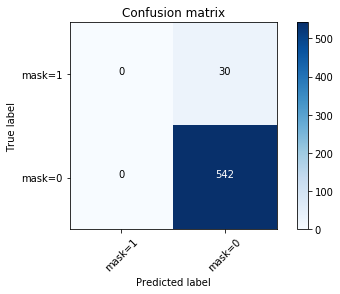

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

# After SMOTE

In [9]:
smt = SMOTE()
X_train, y_train = smt.fit_sample(X_train, y_train)

In [10]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [11]:
y_pred = LR.predict(X_test)

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.64      0.77       542
           1       0.08      0.57      0.14        30

    accuracy                           0.64       572
   macro avg       0.52      0.60      0.46       572
weighted avg       0.92      0.64      0.74       572



In [13]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6381118881118881


Confusion matrix, without normalization
[[ 17  13]
 [194 348]]


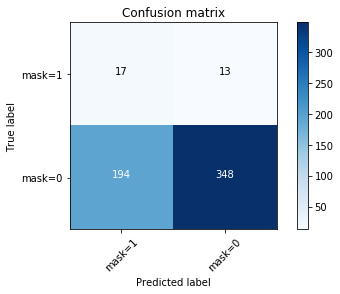

In [14]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['mask=1','mask=0'],normalize= False,  title='Confusion matrix')

In [15]:
lr_probs = LR.predict_proba(X_test)

In [16]:
lr_probs = lr_probs[:, 1]

In [17]:
prec, rec, _ = precision_recall_curve(y_test, lr_probs)
f1 = f1_score(y_test, y_pred) 

In [18]:
au = auc(rec, prec)
print('Decision tree: f1=%.3f auc=%.3f' % (f1, au))

Decision tree: f1=0.141 auc=0.072


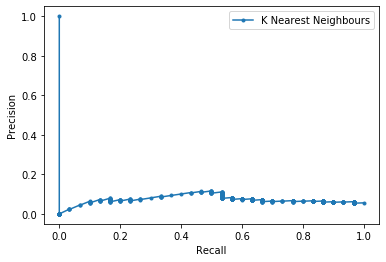

In [19]:
plt.plot(rec, prec, marker='.', label='K Nearest Neighbours')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()